## 8_2 KNN using SKLEARN

In [1]:
import pandas as pd
df=pd.read_csv('data/auto.csv')

In [2]:
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,1,27.0
388,4,97.0,52.0,2130.0,24.6,82,2,44.0
389,4,135.0,84.0,2295.0,11.6,82,1,32.0
390,4,120.0,79.0,2625.0,18.6,82,1,28.0


## 데이터 나누기

In [3]:
df=pd.get_dummies(df,columns=['origin'])
y=df['mpg']
X=df.drop(columns=['mpg'])

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_validate

kfold=KFold(n_splits=5, shuffle=True)
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X,y)
    result=cross_validate(X=X,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=knn)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())

# df에서 값의 범위가 큰 weight에 영향을 많이 받아 성능이 좋지 않게 나옴
# 데이터 정규화 과정 필요

2 0.6798878937802053 -19.16882781564427
3 0.6817624253074035 -18.991399221032133
4 0.7110786321745438 -17.372436445147677
5 0.7098865759713967 -17.354369607270367
6 0.7180220472757654 -16.788325994446247
7 0.7017034981303916 -18.096152998297665
8 0.7165594788647291 -17.045986616561184
9 0.7133295918378817 -17.47530524000144
10 0.7145578507818648 -17.250155952612786
11 0.7145918721427356 -17.158376434076086
12 0.7116359712058777 -17.433807108532584
13 0.7063647942714589 -17.42781558089378
14 0.7038555108695956 -17.8812429621313
15 0.7073744160737873 -17.53725322081575
16 0.7124012354848022 -17.50950096356702
17 0.7094801569044978 -17.744445442487667
18 0.7175176510814245 -17.21402108402355
19 0.7017505930804816 -17.85009898124597
20 0.6985091850194657 -17.836558765822783
21 0.6969758716300888 -17.954749471745853
22 0.6776584123626732 -18.48262473813107
23 0.7035155698248758 -17.83087858016295
24 0.7061321496415459 -17.671357887951245
25 0.7048071921975936 -17.497675263356054
26 0.688562

## 데이터 정규화

In [6]:
X_norm = (X-X.mean())/X.std()

In [7]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
train_mse=[]
test_mse=[]
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X,y)
    result=cross_validate(X=X_norm,y=y,
                          cv=kfold,scoring=['r2','neg_mean_squared_error'],
                          estimator=knn,
                          return_train_score=True)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())
    # train과 test의 mean_squared_error 기록
    train_mse.append(-1*result['train_neg_mean_squared_error'].mean())
    test_mse.append(-1*result['test_neg_mean_squared_error'].mean())
    

2 0.820809616284879 -10.737173320350536
3 0.8477683269687173 -9.196088102708355
4 0.8521715733165939 -8.900400174456347
5 0.854239893988975 -8.882330165530671
6 0.8612471868168022 -8.377255634894876
7 0.8509192302896107 -9.105662679093061
8 0.8455969060836809 -9.23613867758033
9 0.8420913209353594 -9.685817190987374
10 0.8438728020598838 -9.486723203505354
11 0.8319779059508612 -10.185469856572274
12 0.8255966831556014 -10.388603037433734
13 0.8169648108064633 -10.896547063602267
14 0.8124092585059957 -11.20648810682988
15 0.8153784697108272 -11.212610266507989
16 0.8018618843265323 -12.05155750086214
17 0.8100810548924985 -11.386417034194398
18 0.797815069613256 -12.1925617544408
19 0.8040308850450166 -11.959053508187527
20 0.795795110646435 -12.370379974034405
21 0.7907052367239453 -12.444846799306115
22 0.7916162168637146 -12.54637002247848
23 0.7901614084824795 -12.633961213584817
24 0.791773823434727 -12.627130919457068
25 0.7876016851158336 -12.85124880908796
26 0.774258312521950

## 하이퍼 패러미터의 영향

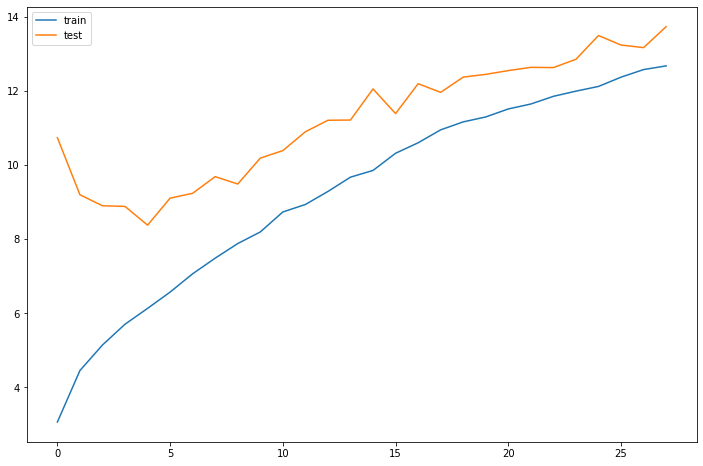

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(train_mse, label='train')
plt.plot(test_mse, label='test')
plt.legend()
# k가 클수록 모델의 유연성이 높아짐


## MinMax Scaling

In [10]:
X_scale = (X-X.min())/(X.max()-X.min())

In [11]:
from sklearn.model_selection import KFold, cross_validate
kfold=KFold(n_splits=5, shuffle=True)
for i in range(2,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_scale,y)
    result=cross_validate(X=X_scale,y=y,cv=kfold,scoring=['r2','neg_mean_squared_error'],estimator=knn)
    print(i, result['test_r2'].mean(), result['test_neg_mean_squared_error'].mean())

2 0.8472354619911412 -9.076581304771178
3 0.8460052661932241 -9.187925204659383
4 0.8719390703798464 -7.7566063980850375
5 0.858002907912528 -8.366095501460565
6 0.8506962877656076 -8.993499720509215
7 0.8518702534157482 -8.905492783286636
8 0.8505341719180974 -8.94705171312074
9 0.8488699197878464 -9.100118319769516
10 0.8413752170686338 -9.550880272638754
11 0.8352885125626741 -9.925289199868027
12 0.8320018525348288 -10.259638746889541
13 0.8264905069592198 -10.309627211252781
14 0.8201587351434462 -10.513224622273446
15 0.8129373796593283 -11.140570970464136
16 0.8199866463180008 -10.800495628448555
17 0.8186658961163319 -10.971350114385638
18 0.8055670721394002 -11.808793836977733
19 0.796601952998313 -12.30055037981876
20 0.7981163902873034 -12.30157773369036
21 0.7991433445195595 -12.129386510549262
22 0.7891096468310586 -12.69571831821803
23 0.7752398310397794 -13.332477077937895
24 0.780887979335495 -13.100233581606805
25 0.7878911879238978 -12.883181825121715
26 0.78550903045